# Лабораторная работа №2
## Визуальный анализ данных

### Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [ ]:
data_path = "forestfires.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### Одиночные признаки
#### Количественные признаки

In [ ]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

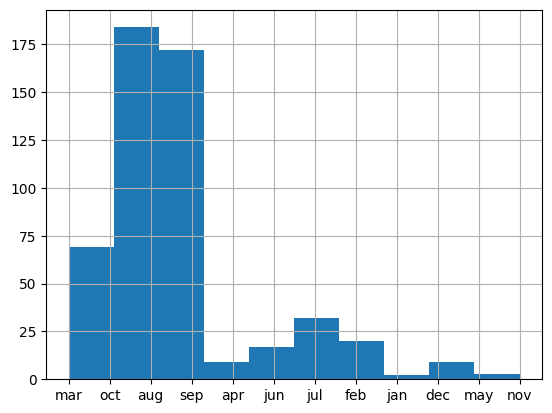

In [ ]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['month'].hist();

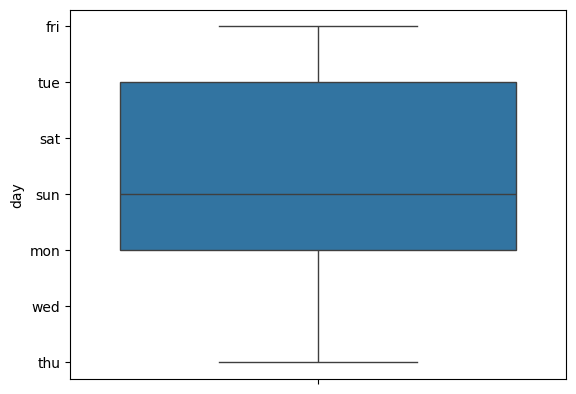

In [ ]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['day']);

<ipython-input-8-905f6a87c4fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='FFMC',


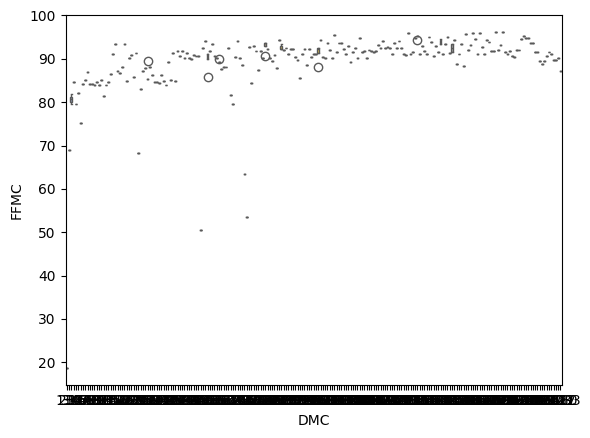

In [ ]:
top_data = data[['FFMC','DMC']]
top_data = top_data.groupby('FFMC').sum()
top_data = top_data.sort_values('DMC',ascending=False)
top_data = top_data.index.values
sns.boxplot(y='FFMC',
            x='DMC',
            data=data[data.FFMC.isin(top_data)], palette='Set2');

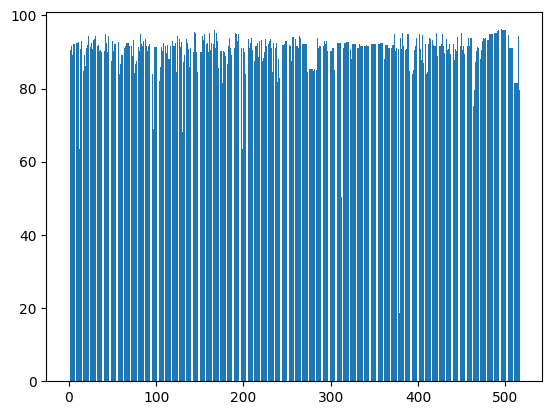

In [ ]:
plt.bar(data.index, data['FFMC'])
plt.show()

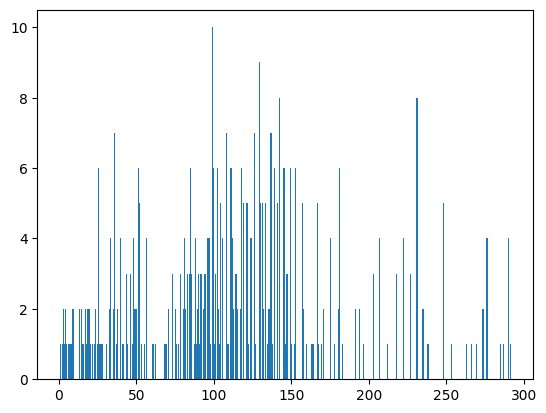

In [ ]:
hist = data['DMC'].value_counts()
plt.bar(hist.index, hist);

In [ ]:
# от признаков
feats=[f for f in data.columns if 'rain' in f]
feats

['rain']

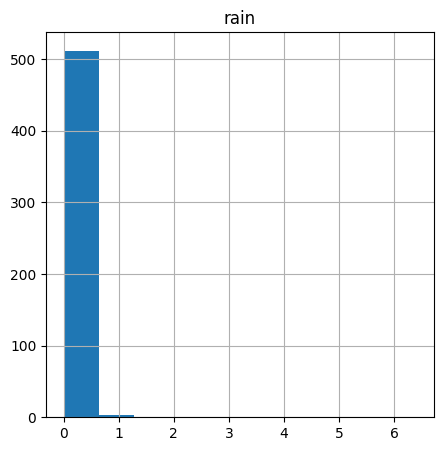

In [ ]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

### Категориальные признаки

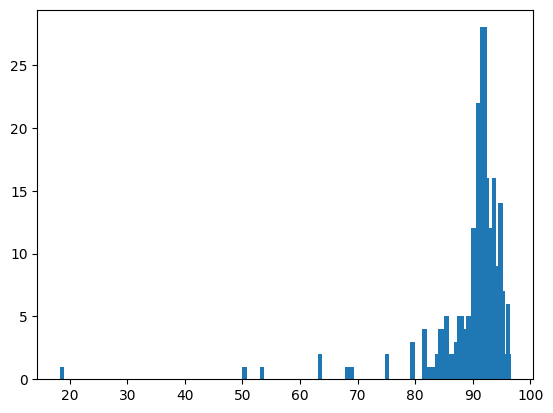

In [ ]:
# определение первых n "популярных" штатов
# data['FFMC'].value_counts().head(10)
hist = data['FFMC'].value_counts()
plt.bar(hist.index, hist);


In [ ]:
# фактически бинарный признак
data['temp'].value_counts()

temp
17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
       ..
16.3    1
12.8    1
10.4    1
8.7     1
25.6    1
Name: count, Length: 192, dtype: int64

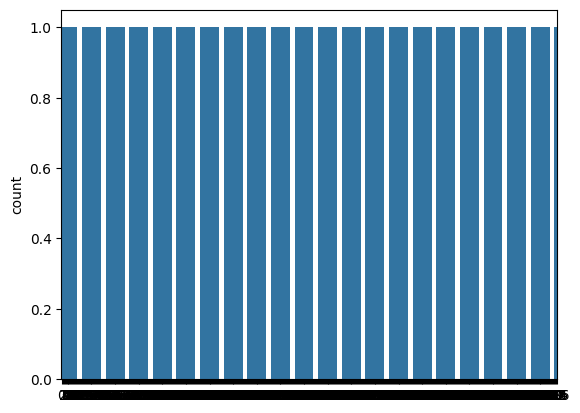

In [ ]:
sns.countplot(data['temp']);

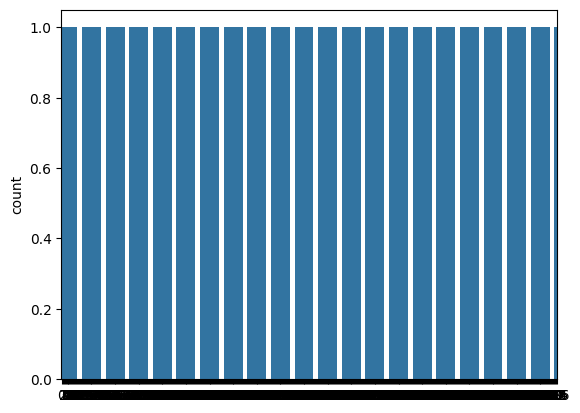

In [ ]:
# гистограмма для всех штатов
sns.countplot(data['FFMC']);

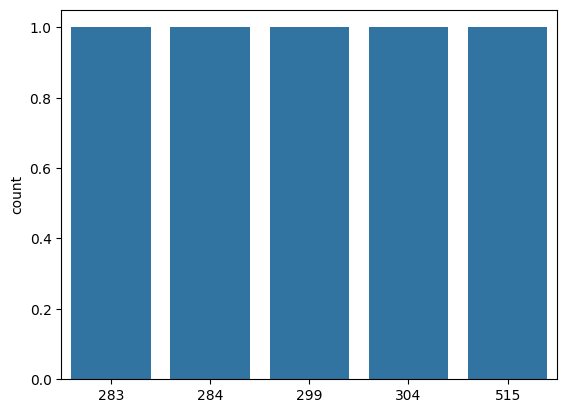

In [ ]:
# гистограмма "популярных" штатов
sns.countplot(data[data['FFMC'].isin(data['FFMC'].value_counts().tail(5).index)]['FFMC']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [ ]:
# список колонок
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [ ]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'DC' in f]
len(feats)

1

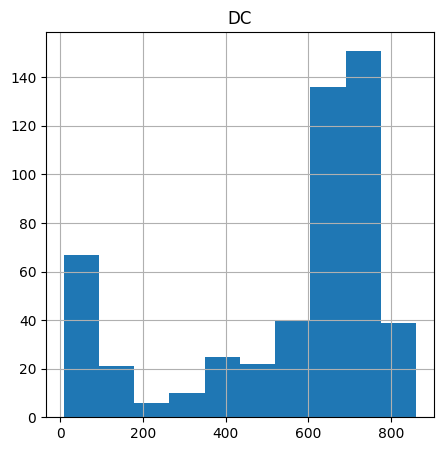

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

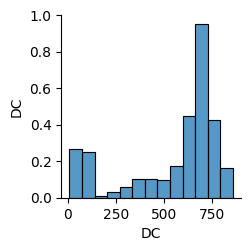

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

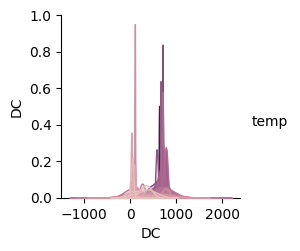

In [ ]:
sns.pairplot(data[feats + ['temp']], hue='temp');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

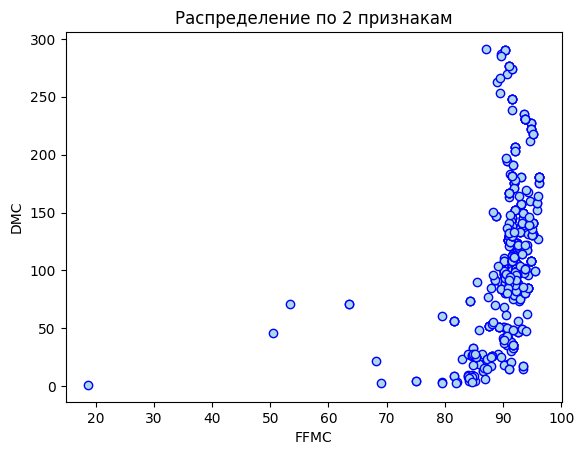

In [ ]:
plt.scatter(data['FFMC'],
            data['DMC'],
            color='lightblue', edgecolors='blue')
plt.xlabel('FFMC')
plt.ylabel('DMC')
plt.title('Распределение по 2 признакам');

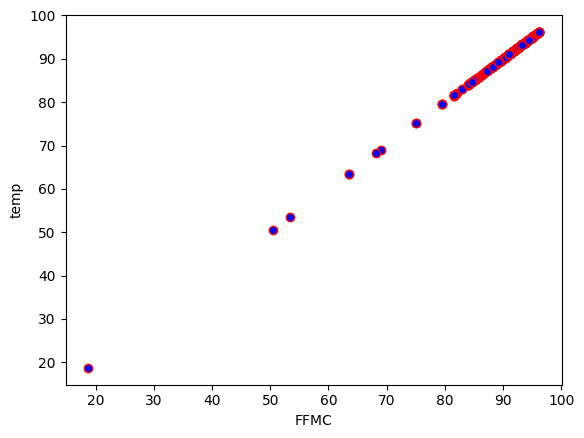

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['temp'].map({False: 'lightblue', True: 'orange'})
edge_c = data['temp'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['FFMC'], data['FFMC'],
            color="blue", edgecolors="red"
           )
plt.xlabel('FFMC')
plt.ylabel('temp');